In [3]:
import pandas as pa
import numpy as nu
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
file = pa.read_csv('~/Downloads/income_data.csv', sep = ',')
print(file)

        Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000


In [6]:
file.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
file.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [9]:
file.ndim

2

In [10]:
file.shape

(22, 3)

In [11]:
file.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [12]:
file.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [13]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [14]:
file.describe(include = 'all')

,Name,Age,Income($)
count,22,22.000000,22.000000
unique,22,NaN,NaN
top,Dipika,NaN,NaN
freq,1,NaN,NaN
mean,NaN,34.818182,90431.818182
std,NaN,5.901060,43505.964412
min,NaN,26.000000,45000.000000
25%,NaN,29.000000,58500.000000
50%,NaN,36.500000,67500.000000
75%,NaN,39.750000,135250.000000


In [15]:
file.var()

Age          3.482251e+01
Income($)    1.892769e+09
dtype: float64

In [16]:
file.corr()

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


In [17]:
file.cov()

,Age,Income($)
Age,34.822511,1.275584e+05
Income($),127558.441558,1.892769e+09


In [19]:
file.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

Text(0, 0.5, 'Income($)')

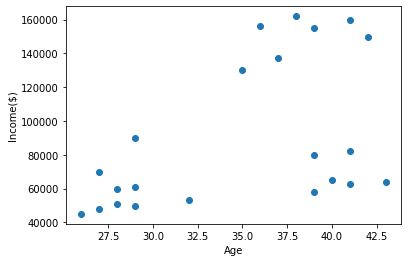

In [21]:
plt.scatter(file.Age,file['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [22]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted = km.fit_predict(file[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [28]:
file['cluster'] = y_predicted
file.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [31]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

Text(0, 0.5, 'Income($)')

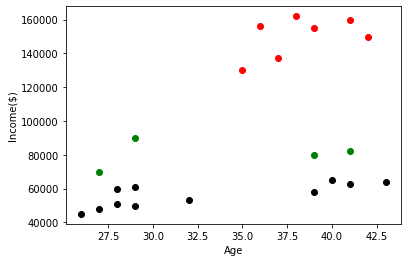

In [32]:
file_1 = file[file.cluster == 0]   # make 3 data frame and each belongs to different cluster
file_2 = file[file.cluster == 1]
file_3 = file[file.cluster == 2]

plt.scatter(file_1.Age,file_1['Income($)'], color = 'green')
plt.scatter(file_2.Age, file_2['Income($)'], color = 'red')
plt.scatter(file_3.Age, file_3['Income($)'], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')

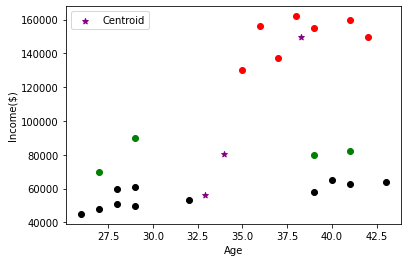

In [34]:
file_1 = file[file.cluster == 0]
file_2 = file[file.cluster == 1]
file_3 = file[file.cluster == 2]

plt.scatter(file_1.Age,file_1['Income($)'], color = 'green')
plt.scatter(file_2.Age, file_2['Income($)'], color = 'red')
plt.scatter(file_3.Age, file_3['Income($)'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [36]:
scaler = MinMaxScaler()

scaler.fit(file[['Income($)']])
file['Income($)'] = scaler.transform(file[['Income($)']])

scaler.fit(file[['Age']])
file['Age'] = scaler.transform(file[['Age']])

In [38]:
print(file)

        Name       Age  Income($)  cluster
0        Rob  0.058824   0.213675        0
1    Michael  0.176471   0.384615        0
2      Mohan  0.176471   0.136752        2
3     Ismail  0.117647   0.128205        2
4       Kory  0.941176   0.897436        1
5     Gautam  0.764706   0.940171        1
6      David  0.882353   0.982906        1
7     Andrea  0.705882   1.000000        1
8       Brad  0.588235   0.948718        1
9   Angelina  0.529412   0.726496        1
10    Donald  0.647059   0.786325        1
11       Tom  0.000000   0.000000        2
12    Arnold  0.058824   0.025641        2
13     Jared  0.117647   0.051282        2
14     Stark  0.176471   0.038462        2
15    Ranbir  0.352941   0.068376        2
16    Dipika  0.823529   0.170940        2
17  Priyanka  0.882353   0.153846        2
18      Nick  1.000000   0.162393        2
19      Alia  0.764706   0.299145        0
20       Sid  0.882353   0.316239        0
21     Abdul  0.764706   0.111111        2


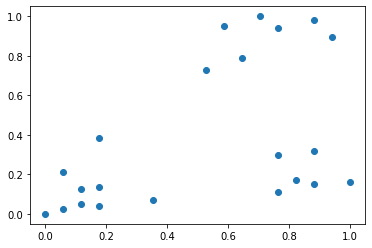

In [40]:
Plot_02 = plt.scatter(file.Age, file['Income($)'])
print(Plot_02)

In [43]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(file[['Age','Income($)']])

In [44]:
file['cluster'] = y_predicted
file.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [45]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

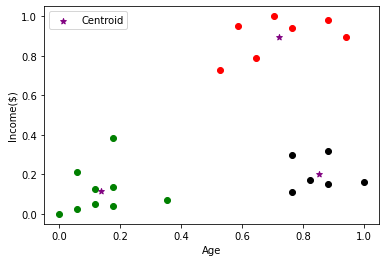

In [50]:
file_01 = file[file.cluster == 0]
file_02 = file[file.cluster == 1]
file_03 = file[file.cluster == 2]

plt.scatter(file_01.Age,file_01['Income($)'], color = 'green')
plt.scatter(file_02.Age, file_02['Income($)'], color = 'red')
plt.scatter(file_03.Age, file_03['Income($)'], color = 'black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [51]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(file[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [52]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.17462386586687892,
 0.13717729016208893,
 0.10383752586603559]

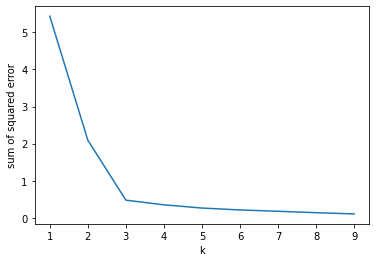

In [53]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)